# Tache 8

Ludovic Delferiere 81232000

# Initialisation du BaF2 et import

In [8]:
from mp_api.client import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import numpy as np
import matplotlib.pyplot as plt

mp_key = "hWWmIDodjhkgKVHj88m318vKs3nGtcQp"
mp_id = "mp-1029"

with MPRester(mp_key) as m:
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Structure des bandes de phonons

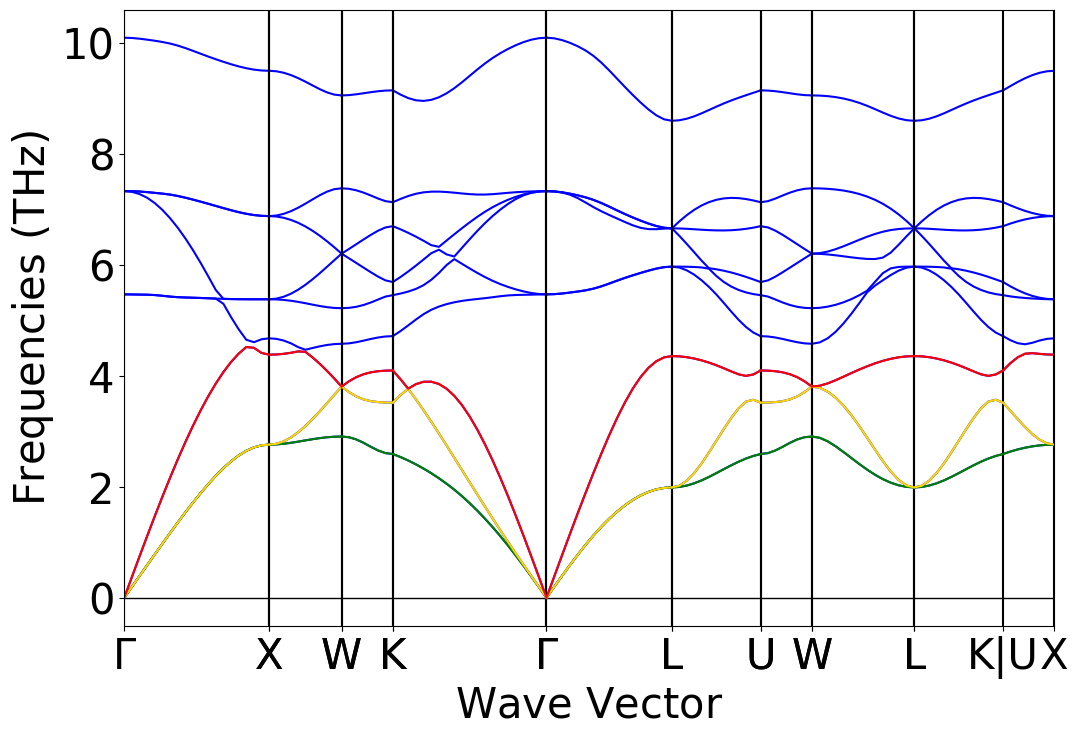

In [9]:
ph_bandstructure = PhononBSPlotter(ph_bs)
data_ph = ph_bandstructure.bs_plot_data()
distances = data_ph['distances']
frequency = data_ph['frequency']

ph_bandstructure_plot = ph_bandstructure.get_plot()

# Affichage de 3 branches acoustiques différentes.
for i in range(len(distances)):
    plt.plot(distances[i], frequency[i][0], color = 'green')
    plt.plot(distances[i], frequency[i][1], color = 'gold')
    plt.plot(distances[i], frequency[i][2], color = 'red')

# Zone de Brillouin

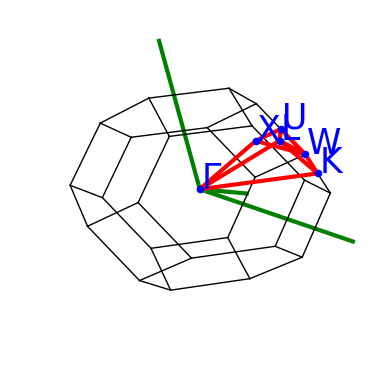

In [10]:

ph_bandstructure.plot_brillouin()

# Calcul des vitesses du son

Déjà, en se référant à la structure de bande des phonons, les 3 directions différentes de la zone de Brillouin que l'on va étudier sont : 
, 
 et 
.

La vitesse du son est calculée comme étant la pente de la relation de dispersion 
 
 avec 
 notre vecteur d'onde et 
 la fréquence angulaire (=
). Si on fait l'hypothèse d'une grande longeur d'onde (et donc d'une faible valeur de vecteur d'onde), cette relation est presque linéaire.

Pour caluler la vitesse du son pour les différentes branches acoustiques, il faut alors calculer la pente de la tangente à ces branches selon la direction choisi pour une fréquence nulle, et la multiplié par 
.

In [11]:
A = 10**10

print ('Γ - X:')
cas_1 = 2*np.pi*np.abs((frequency[0][1][1]-frequency[0][1][0])*(10**12))
cas_1 = cas_1/((distances[0][1]-distances[0][0])*Ang)
print('La vitesse de propagation du son pour la première bande acoustique dans le cas Γ - X vaut {} m/s'.format(cas_1))

print ('K - Γ:')
cas_2 = 2*np.pi*np.abs((frequency[3][0][-1]-frequency[3][0][-2])*(10**12))
cas_2 = cas_2/((distances[3][-1]-distances[3][-2])*Ang)
print('La vitesse de propagation du son pour la seconde bande acoustique dans le cas K - Γ vaut {} m/s'.format(cas_2))

print ('Γ - L:')
cas_3 = 2*np.pi*np.abs((frequency[4][2][1]-frequency[4][2][0])*(10**12))
cas_3 = cas_3/((distances[4][1]-distances[4][0])*Ang)
print('La vitesse de propagation du son pour la troisième bande acoustique dans le cas Γ - L vaut {} m/s'.format(cas_3))

Cas Γ - X
La vitesse de propagation du son pour la première bande acoustique dans le cas Γ - X vaut 2300.8205914008427 m/s
Cas K - Γ
La vitesse de propagation du son pour la seconde bande acoustique dans le cas K - Γ vaut 2260.5223503554207 m/s
Cas Γ - L
La vitesse de propagation du son pour la troisième bande acoustique dans le cas Γ - L vaut 4394.308734926953 m/s
